In [1]:
# Notebook for estimating development from Rt and cases
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (14,10)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
#Settings for plotting
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)

# %matplotlib widget
import matplotlib.colors as colors
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
locale.setlocale(locale.LC_ALL,"Danish")

## Useful commands to copy:
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)

import os
import math

from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Load the admitted file to get weekly number and dates 
dfAdm = pd.read_excel('Admitted/Admitted.xlsx')
dfAdm = dfAdm.transpose()
dfAdm.columns = dfAdm.iloc[0]
dfAdm = dfAdm.drop(['Aldersgruppe']) 
curDates =  pd.to_datetime(dfAdm.index,format='%d_%m_%Y')

In [3]:
df_RT = pd.read_csv('Rt/Rt_cases_2021_05_18.csv',delimiter=';')

df_RT["SampleDate"] = df_RT["SampleDate"].astype('datetime64[D]')
df_RT['estimate'] = pd.to_numeric(df_RT["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_lower'] = pd.to_numeric(df_RT["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df_RT['uncertainty_upper'] = pd.to_numeric(df_RT["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

df_RT


,SampleDate,estimate,uncertainty_lower,uncertainty_upper
0,2020-03-26,0.8,0.6,1.0
1,2020-03-27,0.8,0.7,1.0
2,2020-03-28,0.8,0.6,1.0
3,2020-03-29,0.8,0.6,1.0
4,2020-03-30,0.8,0.6,1.0
5,2020-03-31,0.8,0.6,0.9
6,2020-04-01,0.8,0.6,0.9
7,2020-04-02,0.8,0.6,0.9
8,2020-04-03,0.8,0.6,0.9
9,2020-04-04,0.8,0.6,0.9


In [4]:
# Go through the weekly files and get number of cases
ssidatapath = "ssi_data"
rootdir = os.getcwd()+"/"+ssidatapath

dfCase = pd.DataFrame(columns=dfAdm.columns)
# dfTest = pd.DataFrame(columns=dfAdm.columns)
# dfPosP = pd.DataFrame(columns=dfAdm.columns)

for k in range(0,len(curDates)):
    
    d = curDates[k]
    curIndex = dfAdm.index[k]

    thisDateStr = d.strftime('%Y-%m-%d')
    curDir = rootdir + '/SSI_data_' + thisDateStr 
    curFilePath = curDir + '/Cases_by_age.csv'
    #print(curFilePath)
    try:
        curdf = pd.read_csv(curFilePath,delimiter=';',dtype=str)

        curdf['Antal_bekræftede_COVID-19'] = pd.to_numeric(curdf['Antal_bekræftede_COVID-19'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Antal_testede'] = pd.to_numeric(curdf['Antal_testede'].astype(str).apply(lambda x: x.replace('.','')))
        # curdf['Procent_positive'] = pd.to_numeric(curdf['Procent_positive'].astype(str).apply(lambda x: x.replace(',','.')))

        dfCase.loc[curIndex] = curdf['Antal_bekræftede_COVID-19'].values
        # dfTest.loc[curIndex] = curdf['Antal_testede'].values
        # dfPosP.loc[curIndex] = curdf['Procent_positive'].values
    except:
        print("file_not_found:")
        print(curFilePath)


file_not_found:
/home/berrig/Documents/PandemiX/DanskeData/ssi_data/SSI_data_2020-11-17/Cases_by_age.csv


In [5]:
# Calculate the weekly change
dfCaseDiff = dfCase.diff().iloc[1:]
# Modify the data to suit the actual vaccinated groups:
dfCaseDiff["10-19"] = dfCaseDiff["10-19"].apply(lambda x: int(0.4*x))
# Get the names of the age-groups
allCols = dfCase.columns
# Format the dates into datetime
plotDates =  pd.to_datetime(dfCaseDiff.index,format='%d_%m_%Y')
# Print the latest results to check
dfCaseDiff.tail()

Aldersgruppe,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
27_04_2021,520,362,889,724,755,656,289,112,30,4,4885
04_05_2021,477,390,1204,836,827,699,372,120,16,6,5532
11_05_2021,503,538,1416,942,926,786,377,107,26,1,6431
18_05_2021,569,686,1748,999,1009,823,354,99,17,7,7342
25_05_2021,448,616,1880,883,994,817,319,65,5,1,6952


In [6]:
# Calculation of size of age-group
dfAges = pd.read_excel('DKfolketal2021clean.xlsx')
DK_age = []


#a_list = list(range(0, 100, 10))
#for i, a in enumerate(a_list):
#    if a == a_list[-1]:
#        DK_age.append(dfAges.iloc[a:].Antal.sum())
#    else:
#        DK_age.append(dfAges.iloc[a:a_list[i+1]].Antal.sum())
#DK_age.append(dfAges.Antal.sum())

DK_age.append(dfAges.iloc[0:10].Antal.sum())
DK_age.append(dfAges.iloc[16:20].Antal.sum())
DK_age.append(dfAges.iloc[20:30].Antal.sum())
DK_age.append(dfAges.iloc[30:40].Antal.sum())
DK_age.append(dfAges.iloc[40:50].Antal.sum())
DK_age.append(dfAges.iloc[50:60].Antal.sum())
DK_age.append(dfAges.iloc[60:70].Antal.sum())
DK_age.append(dfAges.iloc[70:80].Antal.sum())
DK_age.append(dfAges.iloc[80:90].Antal.sum())
DK_age.append(dfAges.iloc[90:].Antal.sum())
DK_age.append(dfAges.Antal.sum())


DK_age = np.array(DK_age)
DK_age

case_hosp_rate_pct = [0.953, 0.453, 1.590, 3.431, 4.505, 7.297, 10.494, 16.836, 26.506, 2.083]
case_hosp_rate = np.array([i/100 for i in case_hosp_rate_pct])

# 0-29, 30-69, 70-
immune_rate = np.array([0.1]*3 + [0.07]*2 + [0.06]*5)

In [7]:
# Vaccinationskalender, manuelt aflæst 12/05-2021
vaccKal = pd.DataFrame()

neverDate = np.datetime64('2021-10-30') # A day "far out" in the future, to not show on plot
vaccKal['0-9'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal['10-19'] = [np.datetime64('2021-05-24'),np.datetime64('2021-06-20'),
                    np.datetime64('2021-06-20'),np.datetime64('2021-07-18')]

vaccKal['20-29'] = [np.datetime64('2021-06-14'),np.datetime64('2021-07-25'),
                    np.datetime64('2021-07-25'),np.datetime64('2021-08-29')]

vaccKal['30-39'] = [np.datetime64('2021-06-28'),np.datetime64('2021-08-08'),
                    np.datetime64('2021-08-08'),np.datetime64('2021-08-29')]

vaccKal['40-49'] = [np.datetime64('2021-05-24'),np.datetime64('2021-07-04'),
                    np.datetime64('2021-07-04'),np.datetime64('2021-08-08')]

vaccKal['50-59'] = [np.datetime64('2021-05-03'),np.datetime64('2021-06-06'),
                    np.datetime64('2021-06-06'),np.datetime64('2021-07-11')]

vaccKal['60-69'] = [np.datetime64('2021-04-05'),np.datetime64('2021-05-23'),
                    np.datetime64('2021-05-23'),np.datetime64('2021-06-27')]

vaccKal['70-79'] = [np.datetime64('2021-03-29'),np.datetime64('2021-05-02'),
                    np.datetime64('2021-05-02'),np.datetime64('2021-06-06')]

vaccKal['80-89'] = [np.datetime64('2021-02-01'),np.datetime64('2021-04-04'),
                    np.datetime64('2021-03-04'),np.datetime64('2021-05-02')]

vaccKal['90+'] =   [np.datetime64('2021-02-01'),np.datetime64('2021-02-15'),
                    np.datetime64('2021-02-22'),np.datetime64('2021-03-15')]

# vaccKal['I alt'] = [np.datetime64('2021-07-19'),np.datetime64('2021-08-02'),np.datetime64('2021-08-31')]
vaccKal['I alt'] = [neverDate,neverDate,neverDate,neverDate]

vaccKal

,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
0,2021-10-30,2021-05-24,2021-06-14,2021-06-28,2021-05-24,2021-05-03,2021-04-05,2021-03-29,2021-02-01,2021-02-01,2021-10-30
1,2021-10-30,2021-06-20,2021-07-25,2021-08-08,2021-07-04,2021-06-06,2021-05-23,2021-05-02,2021-04-04,2021-02-15,2021-10-30
2,2021-10-30,2021-06-20,2021-07-25,2021-08-08,2021-07-04,2021-06-06,2021-05-23,2021-05-02,2021-03-04,2021-02-22,2021-10-30
3,2021-10-30,2021-07-18,2021-08-29,2021-08-29,2021-08-08,2021-07-11,2021-06-27,2021-06-06,2021-05-02,2021-03-15,2021-10-30


In [8]:
# Get the daily cases (Run young_age_groups to save new csv)
dfCaseDiffDaily = pd.read_csv('DailyCasesAveraged.csv')

# Get the corresponding dates
curDatesDaily = pd.to_datetime(dfCaseDiffDaily.Dato).values
plotDatesDaily = np.arange(curDatesDaily[0],curDatesDaily[-1]+np.timedelta64(1,'D'),np.timedelta64(1,'D'))

# Adjust to vaccinated groups:
dfCaseDiffDaily["10-19"] = dfCaseDiffDaily["10-19"].apply(lambda x: x*0.4)

# Print to see the last days
dfCaseDiffDaily.tail()



,Unnamed: 0,Dato,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90+,I alt
369,369,2021-05-21,77.00,100.4,391.0,192.00,200.00,177.00,50.00,10.0,3.0,0.0,1351.00
370,370,2021-05-22,55.25,76.4,216.0,99.75,116.25,97.25,40.25,8.5,0.5,0.0,824.75
371,371,2021-05-23,55.25,76.4,216.0,99.75,116.25,97.25,40.25,8.5,0.5,0.0,824.75
372,372,2021-05-24,55.25,76.4,216.0,99.75,116.25,97.25,40.25,8.5,0.5,0.0,824.75
373,373,2021-05-25,55.25,76.4,216.0,99.75,116.25,97.25,40.25,8.5,0.5,0.0,824.75


In [9]:
def time_intervals(t_init, t_cur, t_final):
    tspan = np.timedelta64(t_final - t_init,'D')
    dt = np.timedelta64(pd.to_datetime(t_cur) - t_init,'D') 
    return dt/tspan, dt, tspan

def contact_number(t_list, vcal, RT, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    #t_shift = np.timedelta64(14, "D")
    ret = np.zeros(np.shape(t_list))
    for i, t in enumerate(t_list):
        t = t-t_shift
        if t < vcal[0]:
            ret[i] = RT
        elif vcal[0] <= t < vcal[1]:
            rt, dt, tspan = time_intervals(vcal[0], t, vcal[1])
            ret[i] = RT*((1-rt) + rt*(1-x1))
        elif vcal[1] <= t < vcal[2]:
            ret[i] = RT*(1-x1)
        elif vcal[2] <= t < vcal[3]:
            rt, dt, tspan = time_intervals(vcal[2], t, vcal[3])
            ret[i] = RT*((1-rt)*(1-x1) + rt*(1-x2))
        elif vcal[3] <= t:
            ret[i] = RT*(1-x2)
    return ret

def predicted_cases(t_list, vcal, RT, gen_time=4.7/7, init_count=1, S0=100000, x1=0.75, x2=0.95, t_shift=np.timedelta64(14, "D")):
    cn = contact_number(t_list, vcal, RT, x1=x1, x2=x2, t_shift=t_shift)
    ret = np.zeros(np.shape(cn))
    S = S0
    ret[0] = init_count
    dark_count = 2
    for i, c in enumerate(cn[1:], 1):
        dt = float(np.timedelta64(t_list[i]-t_list[i-1],"D")/np.timedelta64(7,"D"))
        #ret[i] = ret[i-1]*c**(gen_time*dt)
        ret[i] = ret[i-1]*(c**(gen_time*dt))*S/S0
        S = int(S > ret[i-1]*dark_count)*(S - ret[i-1]*dark_count)
    return ret

#def pct_dots(ax, xes, modelCounts, normConst, top=None):
#    pct_list = list(range(0,101,1))
#    modelCounts_cumul = modelCounts.cumsum()
#    if top == None:
#        top = max(modelCounts)*1.1
#    print(top)
#    for l in pct_list:
#        for j, c in enumerate(modelCounts_cumul[:-1]/normConst):
#            if (c <= l/100 < modelCounts_cumul[j+1]/normConst) and (modelCount[j+1] < top):
#                pct_str = f"{100*modelCounts_cumul[j+1]/normConst:.1f}%"
#                ax.plot(xes[j+1], modelCount[j+1], "+r")
#                ax.text(xes[j+1], modelCount[j+1]+25, pct_str, color="red", fontsize=14)

cmap_name = "viridis" # "rainbow" # "jet" # "cool" # 'plasma'


/usr/lib/python3/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


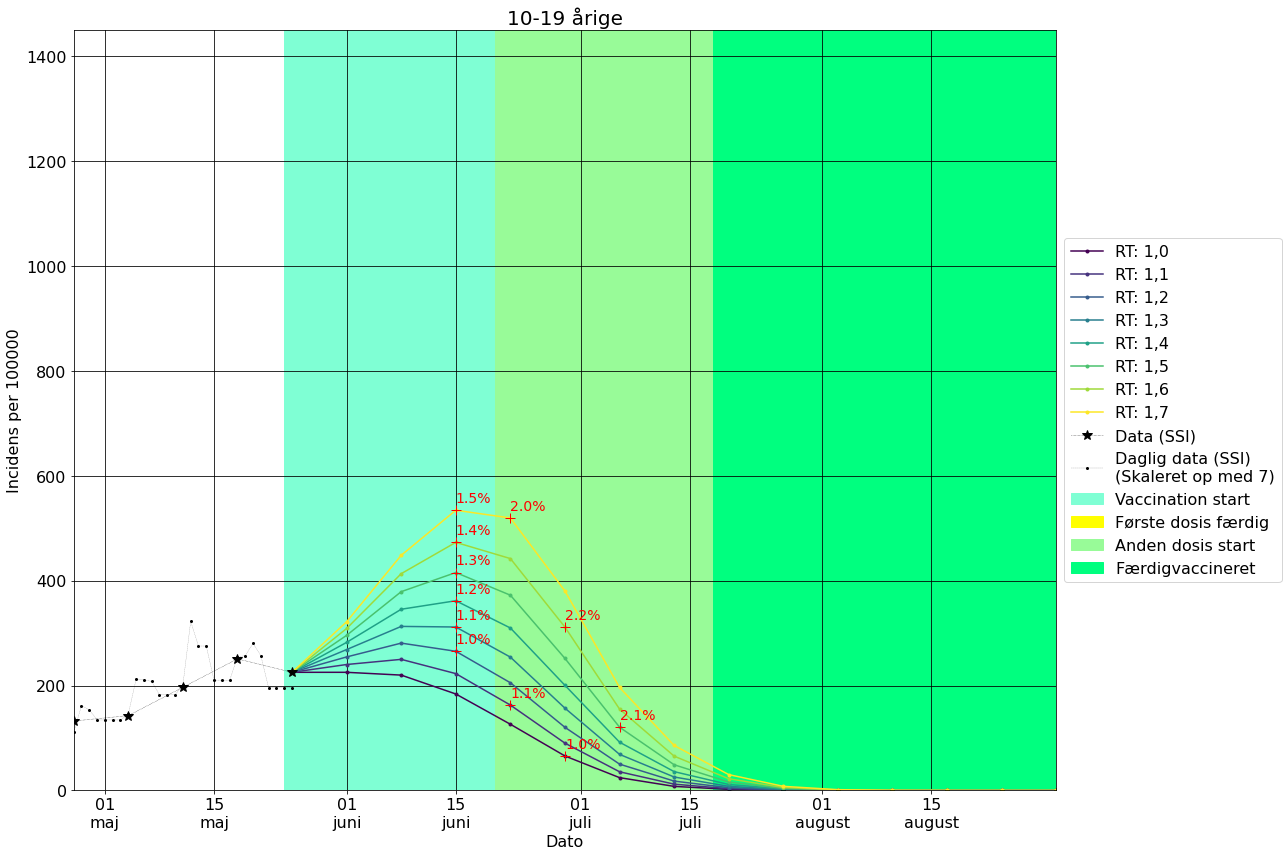

In [10]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

fig,ax1 = plt.subplots(1,1,figsize=(18,12))

# Decide which agegroup to show (see allCols list)
i = 1
curAge = allCols[i]
curPopSize = DK_age[i]
curImmuneRate = immune_rate[i]


# Use latest day with data
tStart = plotDates[-1]

# Predict tEndWeeks forward
tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

# How much to show in plot
xLims = [tStart-tDelta*4,tSpanPlot[-1]]

# Get vaccination dates from calendar
vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

# Get data and initial condition
curData = dfCaseDiff[curAge].values
iniRow = dfCaseDiff.iloc[plotDates == tStart]
iniCount = iniRow[curAge].values[0]

# Plot vaccination
#curMax = max(curData)
ax1.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
ax1.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
ax1.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
ax1.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

# Generation time (4.7 days), in units of weeks 
genTime = 4.7 / 7 

# Go through a number of RT's
allRTs = np.arange(1.0,1.8,0.1)
# Define a colormap for predictions
cmap = plt.cm.get_cmap(cmap_name,len(allRTs))
cmap_prop = plt.cm.get_cmap('cividis',len(allRTs))
for k in range(0,len(allRTs)):
    curRT = allRTs[k]
    
    # Make prediction with current RT
    # modelCount = iniCount * (curRT**(genTime*tSpan))
    curLabel = f'RT: {curRT:.1f}'.replace('.',',')
    # ax1.plot(tSpanPlot,100000 * modelCount/curPopSize,'.-',#label=curLabel,
    #          linewidth=1.5,markersize=6,color=cmap(k), alpha=0.0)
    
    modelCount2 = predicted_cases(tSpanPlot, vaccKal['10-19'], curRT, 
                                  S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
    ax1.plot(tSpanPlot,100000 * modelCount2/curPopSize,'.-',label=curLabel,
             linewidth=1.5,markersize=6,color=cmap(k))
    
    #pct_dots(ax1, tSpanPlot, modelCount2, curPopSize)

    modelCount2_cumul = modelCount2.cumsum()
    pct_list = list(range(0,11,1))
    for i in pct_list:
        for j, c in enumerate(modelCount2_cumul[:-1]/curPopSize):
            if c <= i/100 < modelCount2_cumul[j+1]/curPopSize:
                pct_str = f"{100*modelCount2_cumul[j+1]/curPopSize:.1f}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)
                
# Plot data
ax1.plot(plotDates,100000 * curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
# Also plot daily data, scaled up to weekly numbers
curDataDaily = dfCaseDiffDaily[curAge].values
ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=1450)
# ax1.set_yscale("log")

ax1.set_xlim(xLims)
# Readable dates on x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_ylabel('Incidens per 100000')
ax1.set_xlabel('Dato')

ax1.grid(color='black')

ax1.set_title(curAge+' årige')
if (curAge == 'I alt'):
    ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

10-19 273589
20-29 778740
30-39 696679
40-49 748824
50-59 801166
60-69 667583
70-79 574697
80-89 236648
90+ 45458


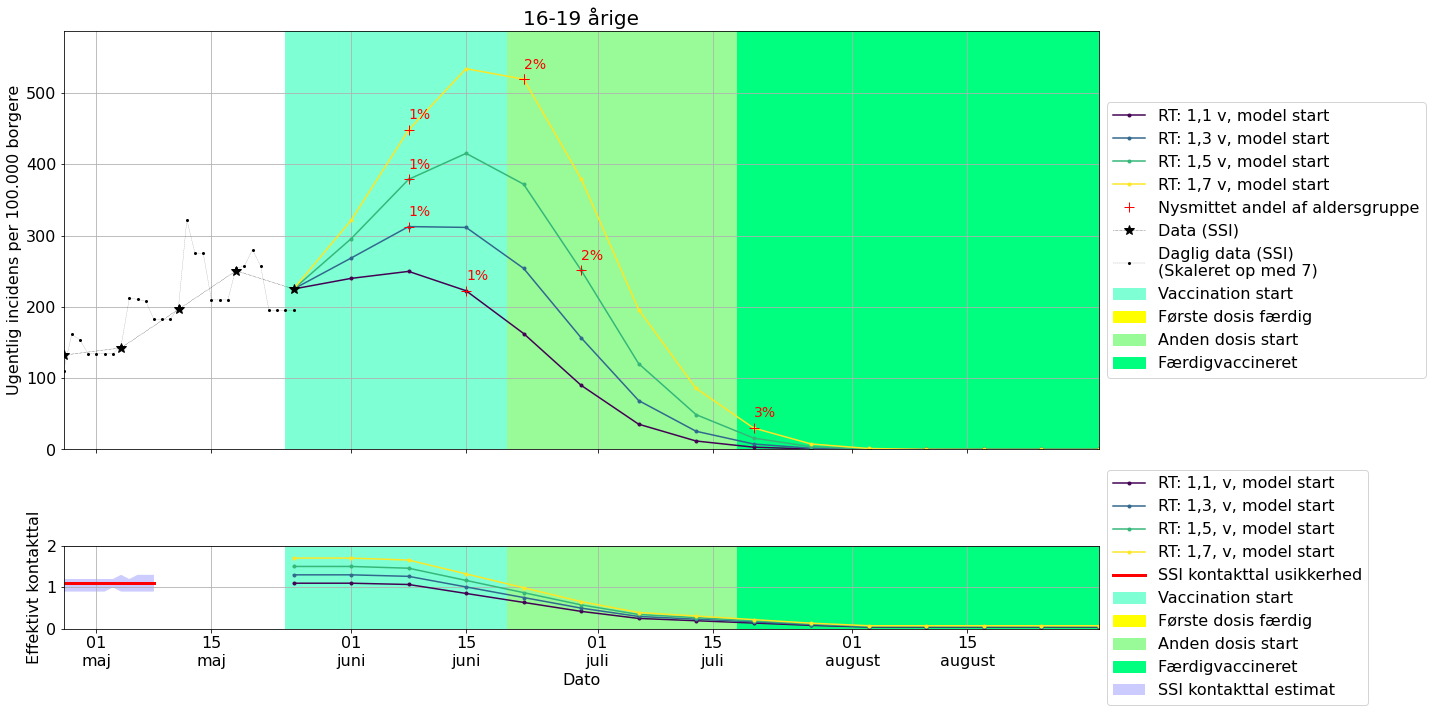

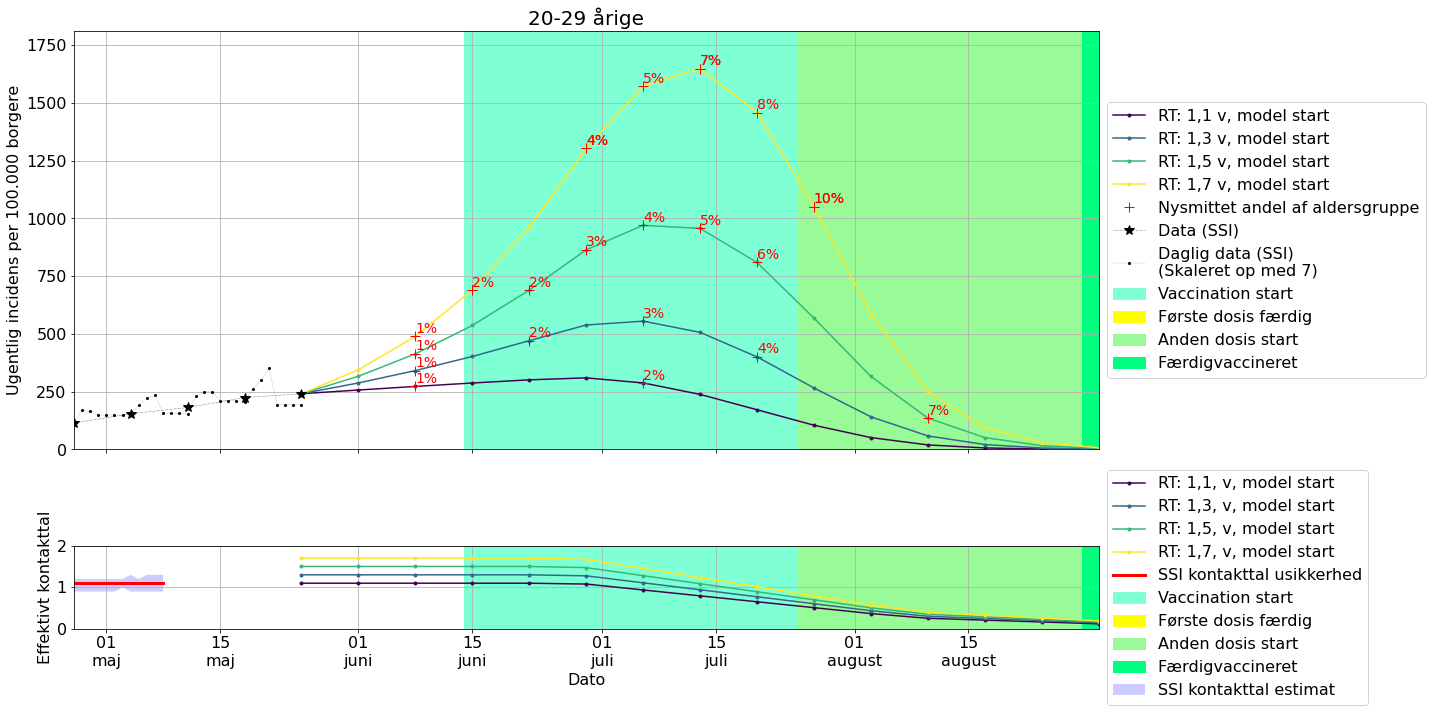

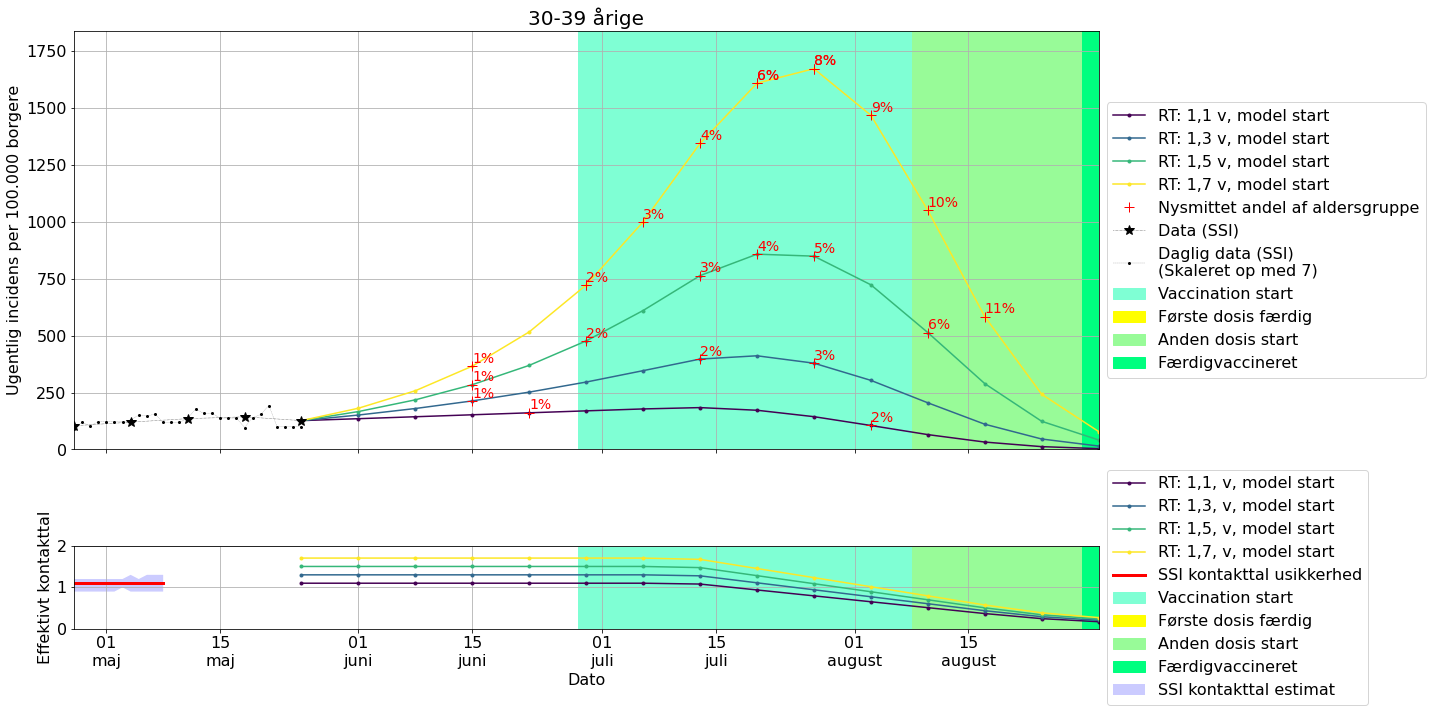

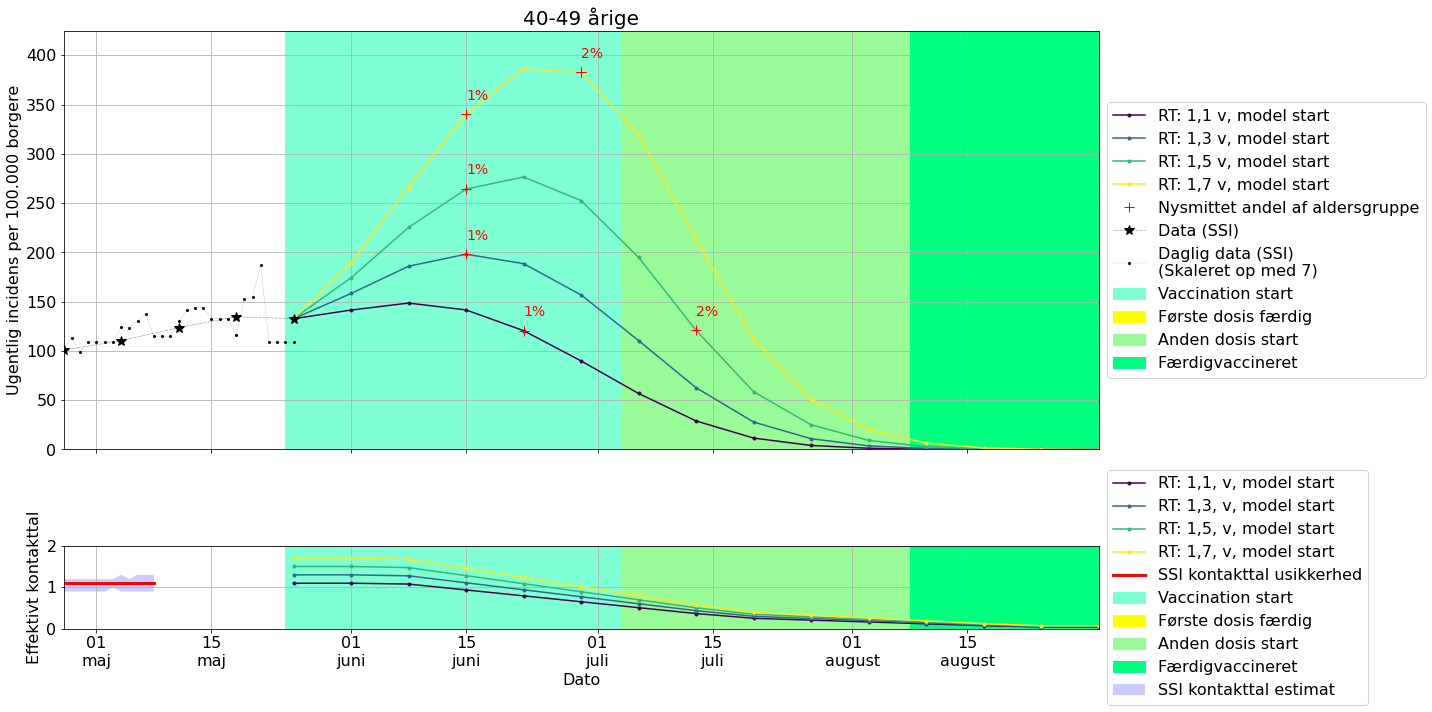

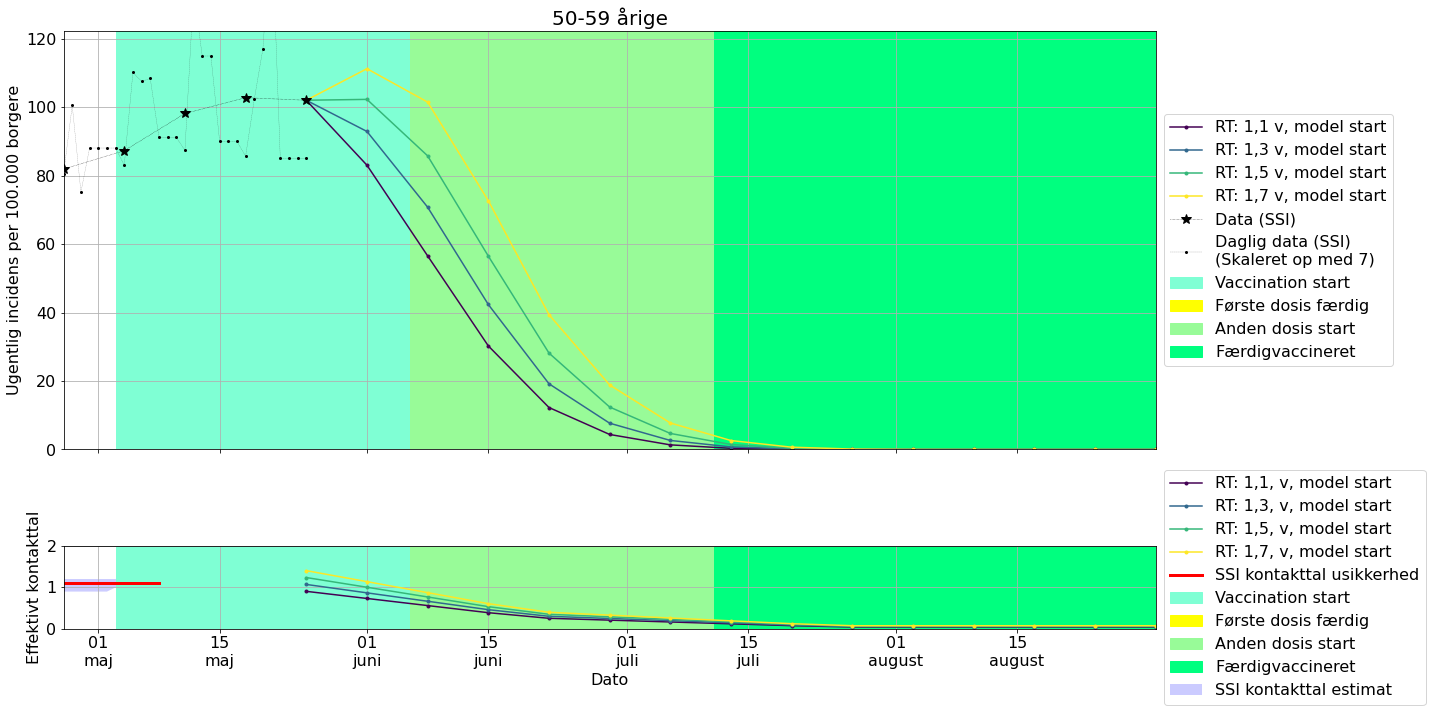

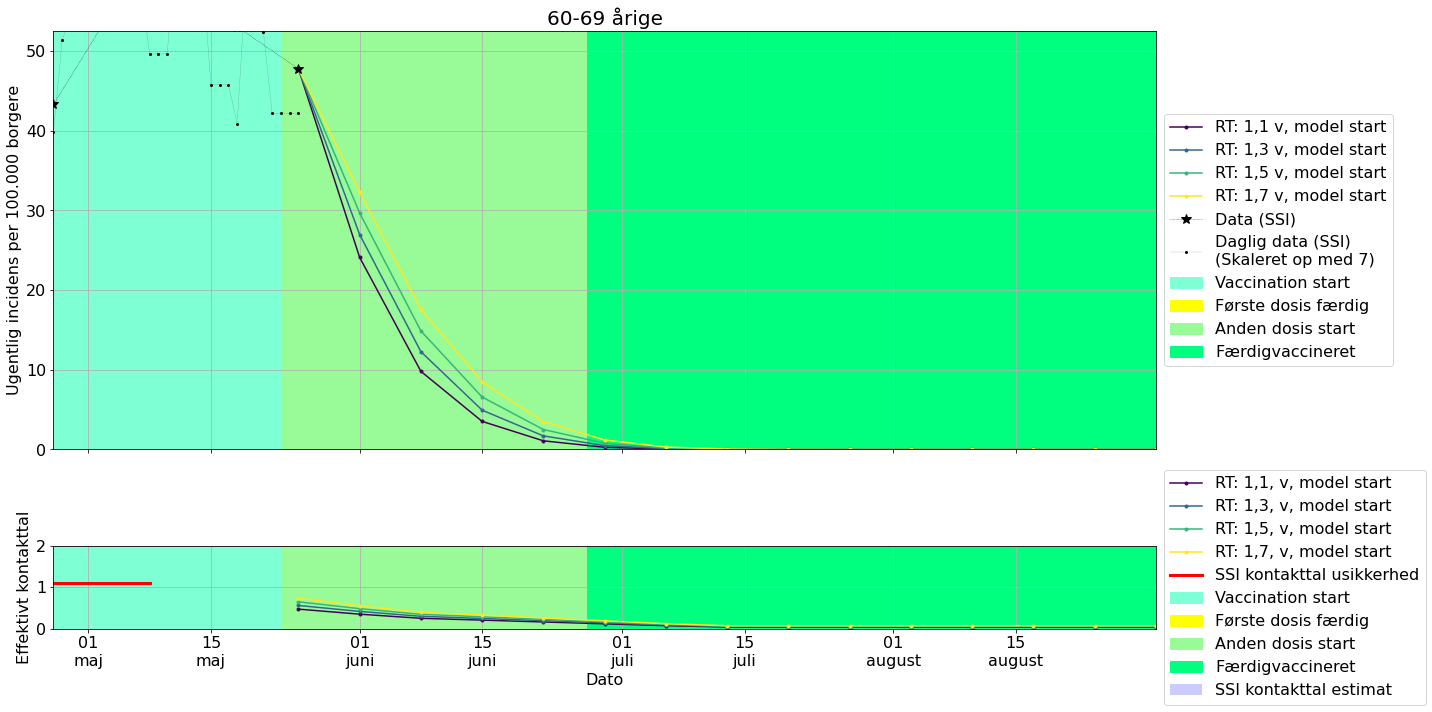

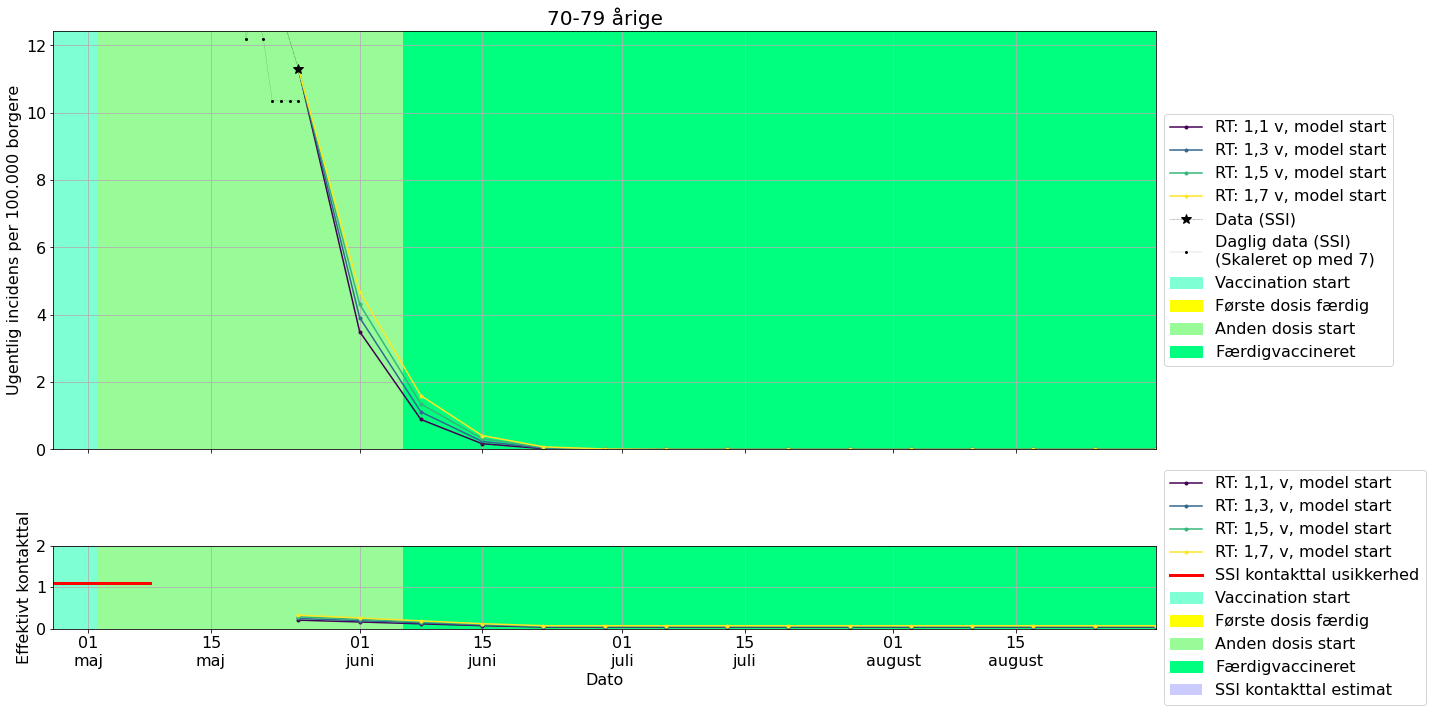

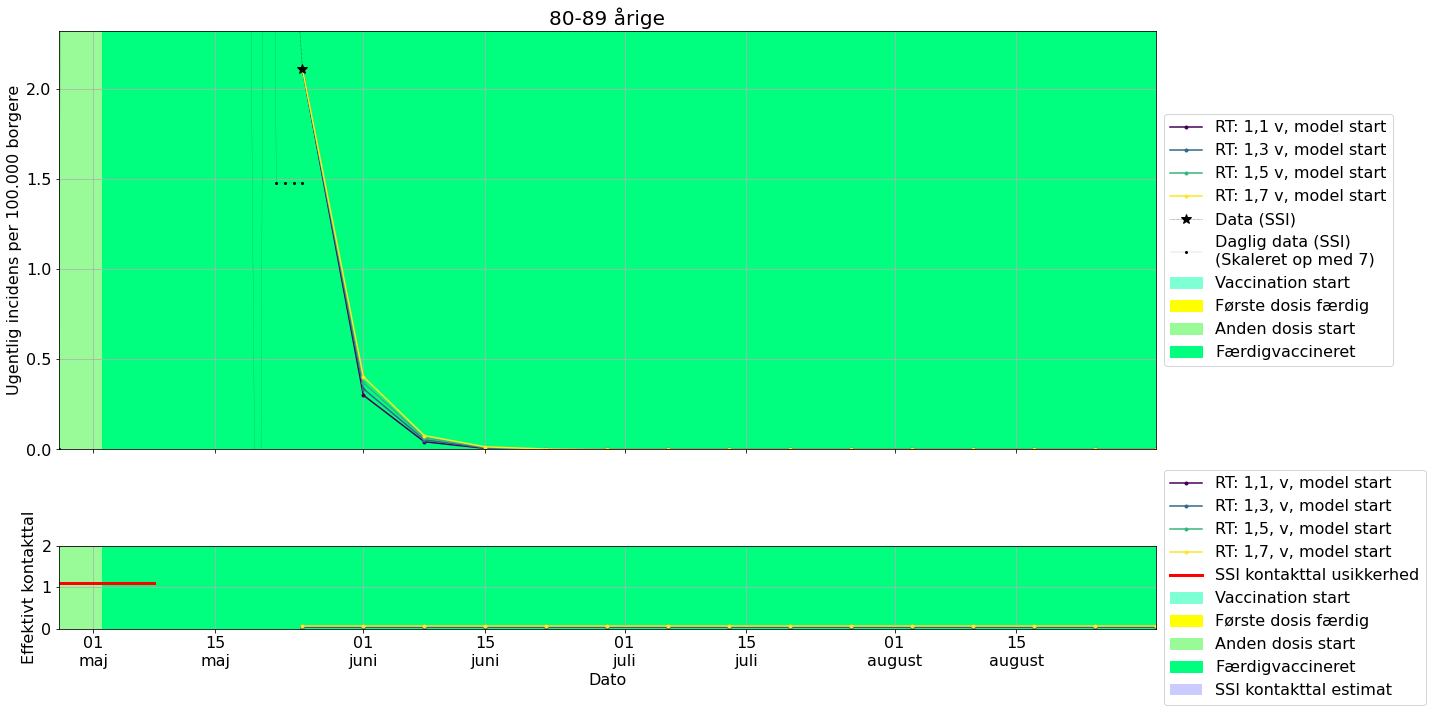

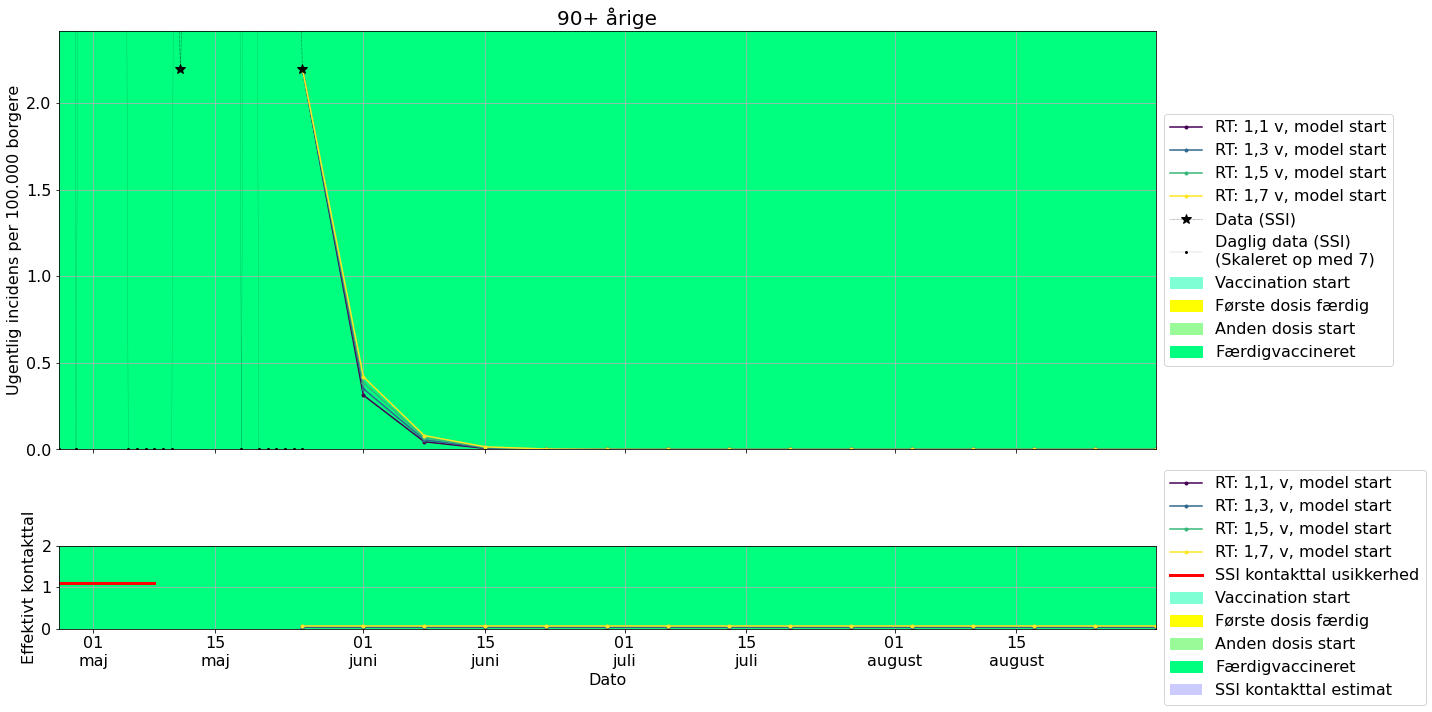

In [11]:
# Forskellige Rt for aldersgruppe, hvor mange ugentligt smittede har vi før gruppen er vaccineret

showMax = False

# tStart = np.datetime64('2021-04-27')
tStart = plotDates[-1]

tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

genTime = 4.7 / 7 # Generation time, in weeks
allRTs = np.arange(1.1,1.8,0.2)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))


for i, col in enumerate(curCols[1:-1], 1):

    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]
    print(curAge, curPopSize)

    # vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]

    curMax = 1200

    #fig2,ax2 = plt.subplots(1,1,figsize=(20,10))
    fig, (ax1, ax2) = plt.subplots(2,1,figsize=(20,10), sharex=True, gridspec_kw={"height_ratios":[5,1]})
    
    # this autofill span for entire plt heigt...
    # ax1.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    # ax1.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    # ax1.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    ax1.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
    ax1.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    ax1.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
    ax1.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    #fig2,ax2 = plt.subplots(1,1,figsize=(20,4))
    # ax2.axvspan(vaccIni,vaccOne,color='aquamarine')#,label='Vaccination start')
    # ax2.axvspan(vaccOne,vaccTwo,color='palegreen')#,label='Første dosis')
    # ax2.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen')#,label='Færdigvaccineret')
    
    ax2.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
    ax2.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    ax2.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
    ax2.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    
    # for curRT in allRTs:
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize, '.-', 
                 label=f'RT: {curRT:.1f} v. model start'.replace('.',','),
                 linewidth=1.5, markersize=6, color=cmap(k))
        
        ax2.plot(tSpanPlot, contact_number(tSpanPlot, vaccKal[curAge], curRT), '.-', 
                 label=f'RT: {curRT:.1f}, v. model start'.replace('.',','), 
                 linewidth=1.5, markersize=6, color=cmap(k))

        curMax = max(100000*modelCount2/curPopSize)*1.1
        modelCount2_cumul = modelCount2.cumsum()
        rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

        pct_list = list(range(0,101,1))
        for i in pct_list:
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]
            for j, c in enumerate(rmc[:-1]/curPopSize):
                filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
                if (filt and 100000*modelCount2[j+1]/curPopSize < curMax):
                    pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                    ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                    ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, 
                             pct_str, color="red", fontsize=14)
                    if i==1 and curRT==max(allRTs):
                        ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, 
                                 "+r", label="Nysmittet andel af aldersgruppe")


    ax2.fill_between(df_RT["SampleDate"], df_RT["uncertainty_lower"], df_RT["uncertainty_upper"], 
                     label="SSI kontakttal estimat", facecolor="blue", alpha=0.2)
    ax2.plot(df_RT["SampleDate"], df_RT["estimate"], label="SSI kontakttal usikkerhed", 
             color="red", linestyle="-")                    
    
    ax1.plot(plotDates, 100000*curData/curPopSize,'k*:',linewidth=0.5,label=f'Data (SSI)')
    
    ax1.plot(plotDatesDaily,100000 * (curDataDaily*7)/curPopSize,'k.:',
             linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')

    ax1.set_ylim(bottom=0, top=curMax)
    ax2.set_ylim(bottom=0, top=2)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
    ax1.set_xlim(xLims)

    ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
    ax2.set_ylabel('Effektivt kontakttal')
    ax2.set_xlabel('Dato')

    ax1.grid()
    ax2.grid()
    
    ax1.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    
    ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))
    
    ax2.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

    plt.tight_layout()

    if saveFigures:
        plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)

    

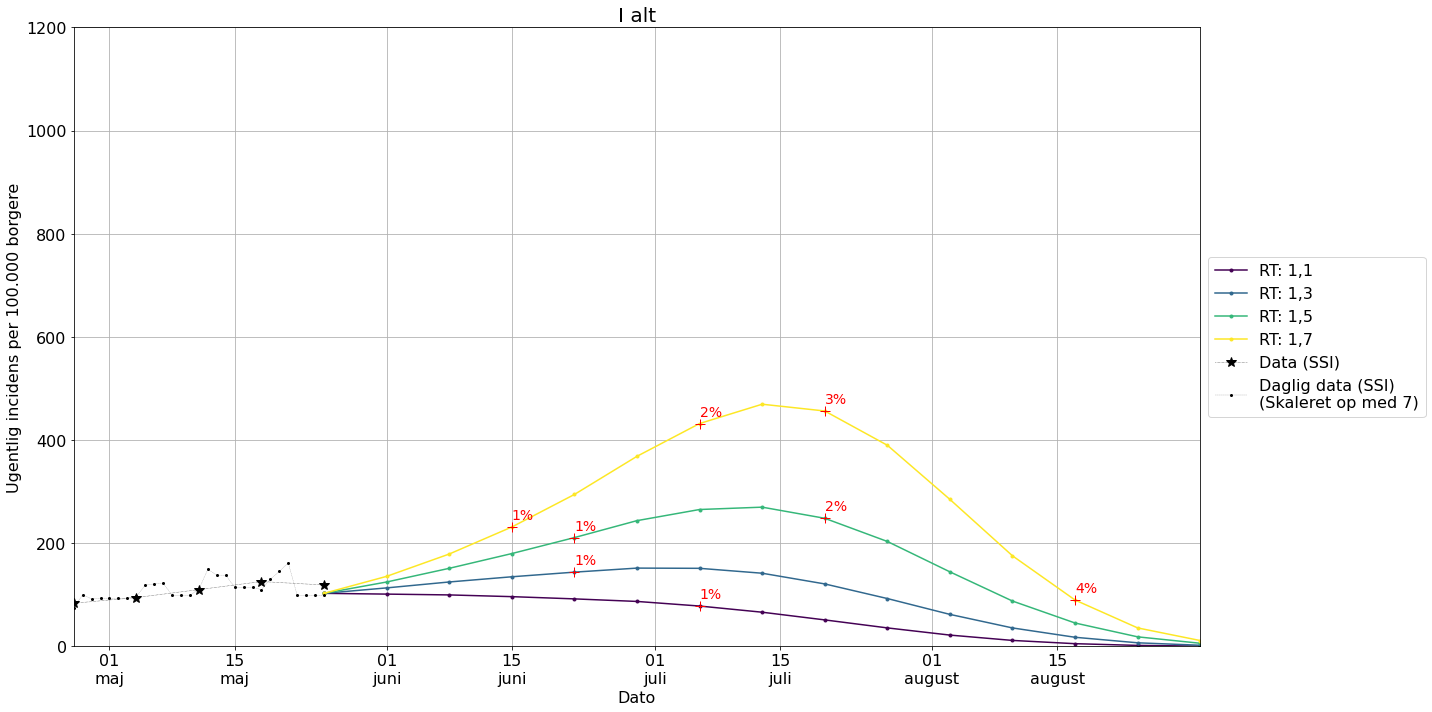

In [12]:
# Here comes the "I alt" plot

allRTs = np.arange(1.1,1.8,0.2)
genTime = 4.7 / 7 # Generation time, in weeks

tStart = plotDates[-1]
# print(tStart)

tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

xLims = [tStart-tDelta*4,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

curCols = dfCaseDiff.columns

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

curMax = 1200


weights = [l/DK_age[-1] for l in DK_age[:-1]]
modArray = []
modCN = []

for i in range(0,len(curCols[:-1])):
    curAge = curCols[i]
    curPopSize = DK_age[i]
    curImmuneRate = immune_rate[i]

    # vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values
    iniCount = iniRow[curAge].values[0]


    # for curRT in allRTs:
    RTArray = []
    CNArray = []
    for k in range(0,len(allRTs)):
        curRT = allRTs[k]
        modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                      S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime)
        CN = contact_number(tSpanPlot, vaccKal[curAge], curRT)
        
        RTArray.append(modelCount2)
        CNArray.append(modelCount2)

    modArray.append(RTArray)
    modCN.append(CNArray)


RTmodels_avg = []
CNmodels_avg = []
for i in range(0,len(allRTs)):
    avg_tmp = [len(curCols[1:-1])*sum([weights[j]*modArray[j][i][k] for j, col in enumerate(curCols[1:-1],1)])
               for k in range(len(tSpanPlot))]
    RTmodels_avg.append(avg_tmp)


i = 10
curAge = curCols[i]
curPopSize = DK_age[i]

curData = dfCaseDiff[curAge].values
curDataDaily = dfCaseDiffDaily[curAge].values
iniCount = iniRow[curAge].values[0]

RTmodels_avg = np.array(RTmodels_avg)

#lastDateStr = pd.to_datetime(tSpanPlot[-1]).strftime('%d. %b')

fig,ax1 = plt.subplots(1,1,figsize=(20,10))

for k in range(0,len(allRTs)):
    
    modelCount2, curPopSize = RTmodels_avg[k], DK_age[-1]
    
    ax1.plot(tSpanPlot, 100000*modelCount2/curPopSize,'.-',label=f'RT: {allRTs[k]:.1f}'.replace('.',','),
             linewidth=1.5,markersize=6,color=cmap(k))
    
    modelCount2_cumul = modelCount2.cumsum()
    rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

    pct_list = list(range(0,101,1))
    for i in pct_list:
        for j, c in enumerate(rmc[:-1]/curPopSize):
            filt = (round(100*c) <= i < round(100*rmc[j+1]/curPopSize))
            if filt and 100000*modelCount2[j+1]/curPopSize < curMax:
                pct_str = f"{round(100*rmc[j+1]/curPopSize)}%"
                ax1.plot(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize, "+r")
                ax1.text(tSpanPlot[j+1], 100000*modelCount2[j+1]/curPopSize+15, pct_str, color="red", fontsize=14)

ax1.plot(plotDates, 100000*curData/curPopSize, 'k*:', linewidth=0.5,label=f'Data (SSI)')

ax1.plot(plotDatesDaily, 100000*(curDataDaily*7)/curPopSize, 'k.:',
         linewidth=0.25,markersize=4,label=f'Daglig data (SSI)\n(Skaleret op med 7)')


ax1.set_ylim(bottom = 0,top=curMax)

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.set_xlim(xLims)

ax1.set_ylabel('Ugentlig incidens per 100.000 borgere')
ax1.set_xlabel('Dato')

ax1.grid()

ax1.set_title(curAge)

ax1.legend(loc='center left',bbox_to_anchor = (1.0, 0.5))

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_fremskrivning_Per100000_'+curAge)
        

# Tables

In [13]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
# fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1]
print(tStart)

tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    #curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    # curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    # curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    # curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    # curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    # if (curAge == 'I alt'):
    #     curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            for v1 in np.arange(vacc1_min, vacc2_min, 0.05):
                modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                              S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime, 
                                              x1=v1)

                modelMax = max(modelCount2)
                top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

                # curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                #            linewidth=1.5, markersize=6, color=cmap(k))

                modelCount2_cumul = modelCount2.cumsum()
                rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

                for n in range(len(tSpanPlot)):
                    new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                               'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                               'Count':modelCount2[n], 'CountCumul':rmc[n]}
                    model_df = model_df.append(new_row, ignore_index=True)

                RTArray.append(modelCount2)

                # pct_list = list(range(1,101,1))
                # for l in pct_list:
                #     for j, c in enumerate(rmc[:-1]/curPopSize):
                #         filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                #         if filt and (modelCount2[j+1] < top):
                #             pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                #             curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                #             curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

            modArray.append(RTArray)


    # urAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    # curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
    #            linewidth=0.25, markersize=4)

    # curAx.set_ylim(bottom=0, top=top)

    # curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    # curAx.set_xlim(xLims)

    # curAx.set_ylabel('Ugentlige smittetilfælde')
    # curAx.set_xlabel('Dato')

    # curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    # curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

# if saveFigures:
#     plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction_var_vacc.csv')
model_df.loc[model_df["Age"]=="20-29"]

2021-05-25 00:00:00


,Age,CaseHospRate,Population,Start,End,RT,Count,CountCumul,vacc1,PctCumul,HospCumul
1485,20-29,0.0159,778740,2021-05-25,2021-05-25,0.9,1880.000000,0.000000,0.40,0,0.000000
1486,20-29,0.0159,778740,2021-05-25,2021-06-01,0.9,1751.600106,1751.600106,0.40,0.00224927,27.850442
1487,20-29,0.0159,778740,2021-05-25,2021-06-08,0.9,1623.214467,3374.814573,0.40,0.00433369,53.659552
1488,20-29,0.0159,778740,2021-05-25,2021-06-15,0.9,1496.679684,4871.494256,0.40,0.00625561,77.456759
1489,20-29,0.0159,778740,2021-05-25,2021-06-22,0.9,1373.549521,6245.043777,0.40,0.00801942,99.296196
1490,20-29,0.0159,778740,2021-05-25,2021-06-29,0.9,1246.848758,7491.892535,0.40,0.00962053,119.121091
1491,20-29,0.0159,778740,2021-05-25,2021-07-06,0.9,1074.500921,8566.393456,0.40,0.0110003,136.205656
1492,20-29,0.0159,778740,2021-05-25,2021-07-13,0.9,876.139675,9442.533130,0.40,0.0121254,150.136277
1493,20-29,0.0159,778740,2021-05-25,2021-07-20,0.9,673.372887,10115.906017,0.40,0.0129901,160.842906
1494,20-29,0.0159,778740,2021-05-25,2021-07-27,0.9,485.612801,10601.518818,0.40,0.0136137,168.564149


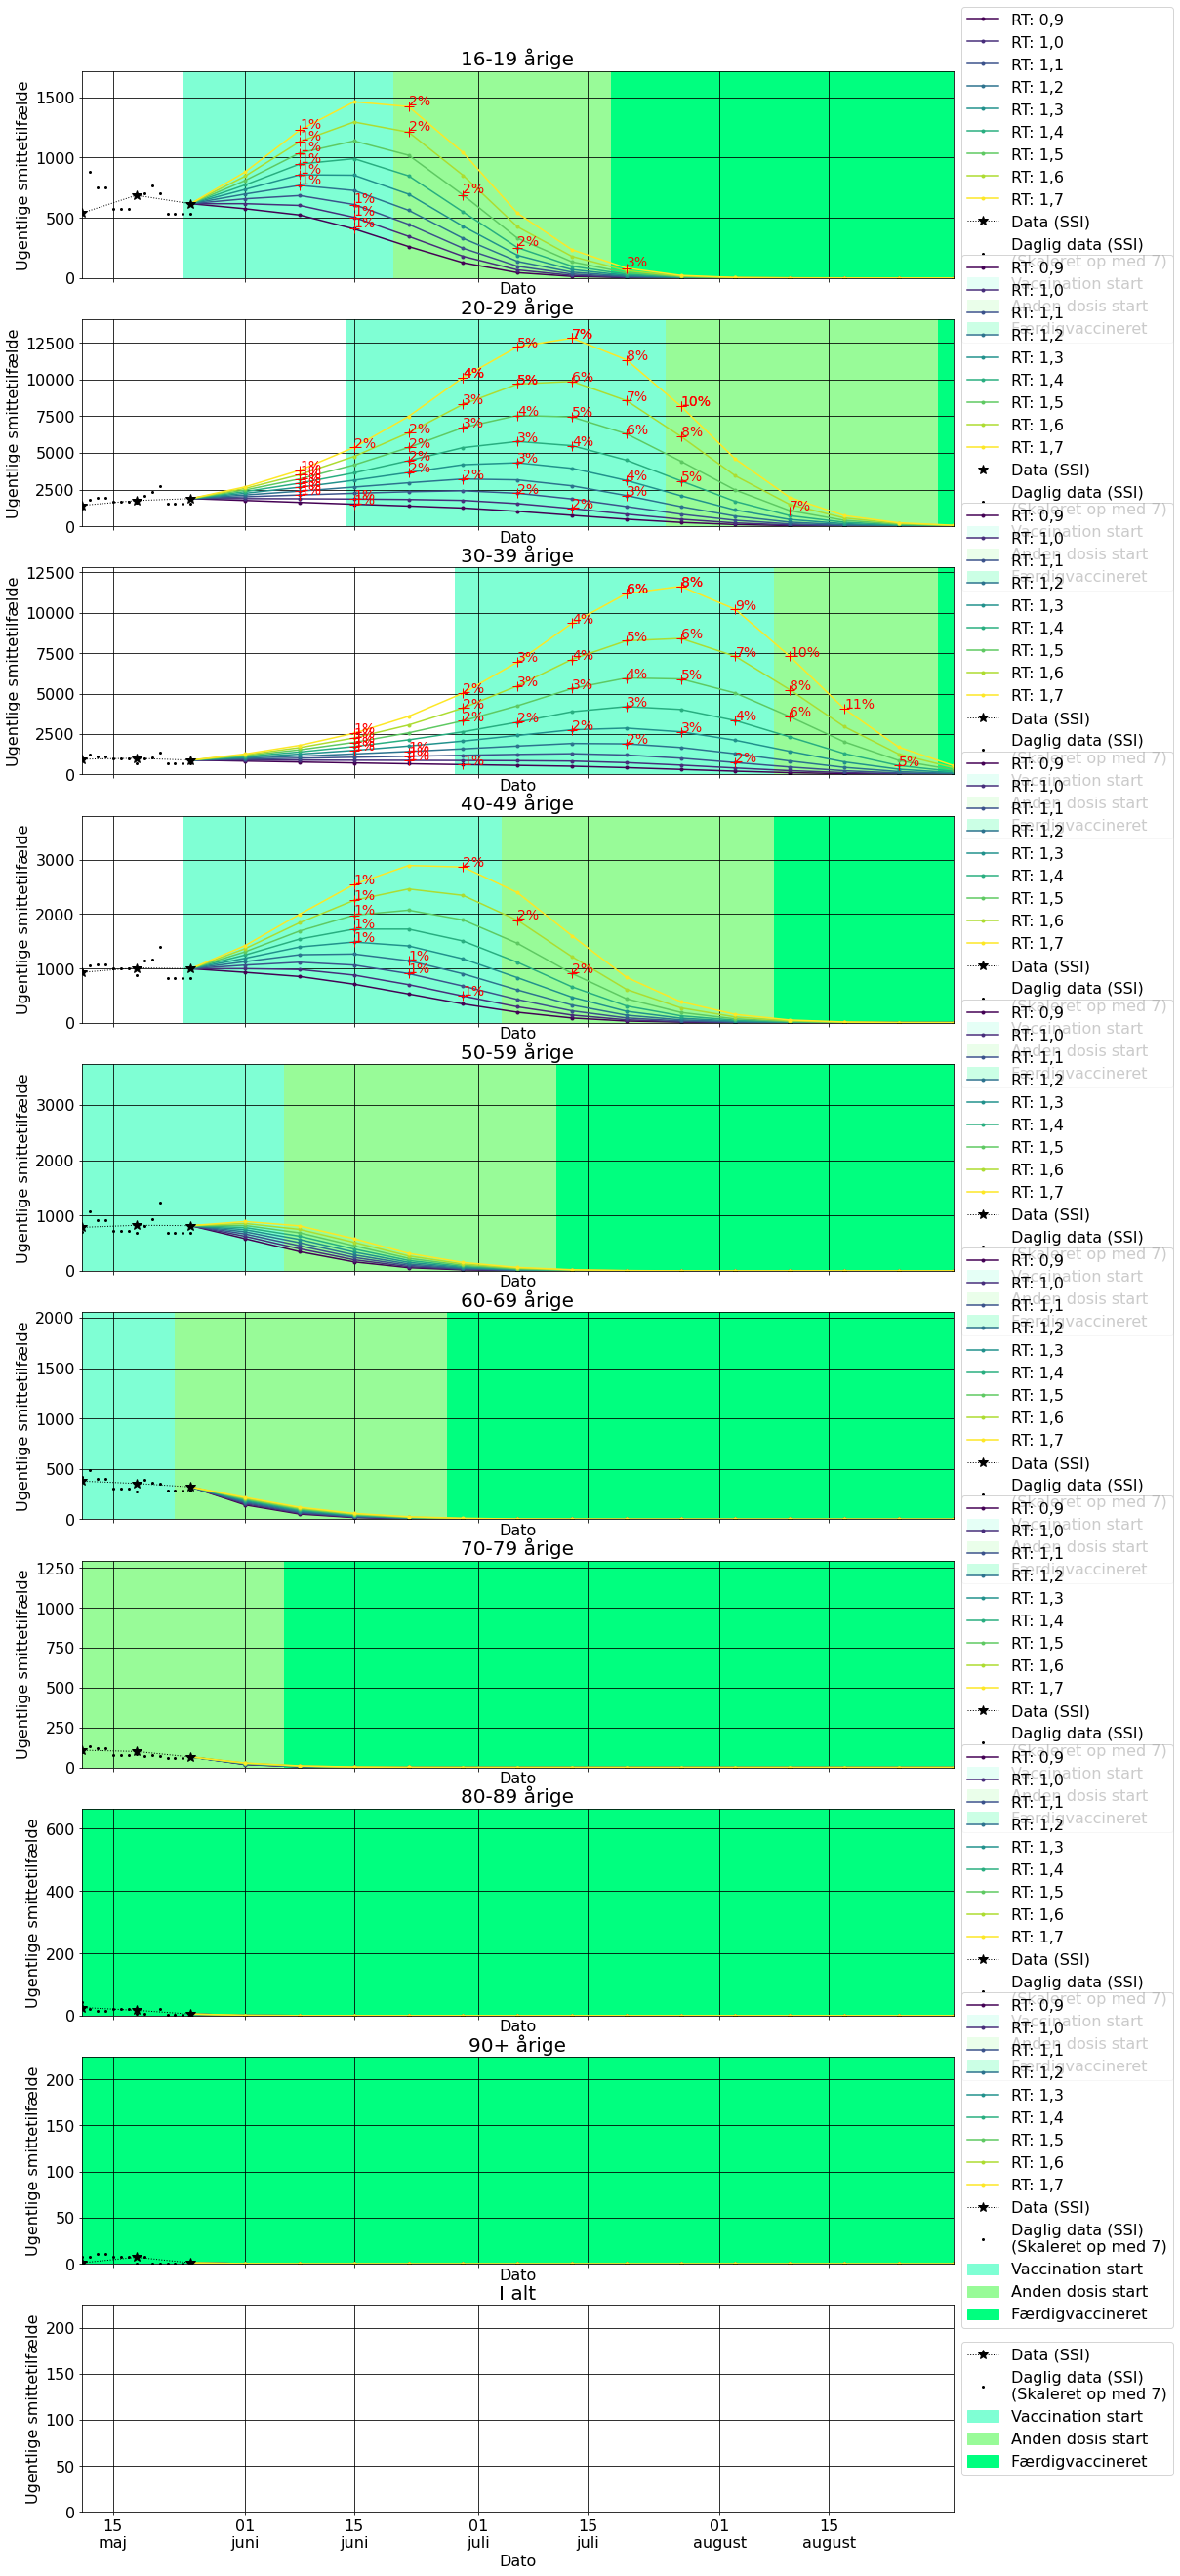

In [14]:
# Same thing, but in one large plot. Starting in the middle of april
cols = ['Age', 'CaseHospRate', 'Population', 'Start', 'End', 'RT', 'Count', 'CountCumul']
model_df = pd.DataFrame(columns=cols)


# allAges = dfCaseDiff.columns[0:6]
allAges = dfCaseDiff.columns[1:]

# fig,ax1 = plt.subplots(1,1,figsize=(12,6))
fig, allAxes = plt.subplots(len(allAges),1,sharex=True,figsize=(16,46))
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True, gridspec_kw={'height_ratios': [4, 1]})

showMax = True

genTime = 4.7 / 7 # Generation time, in weeks

#allRTs = np.arange(0.9,1.8,0.1)
allRTs = np.arange(0.9,1.8,0.1)

cmap = plt.cm.get_cmap(cmap_name,len(allRTs))

#tStart = np.datetime64('2021-05-18')
tStart = plotDates[-1]

tEndWeeks = 15
tDelta = np.timedelta64(7,'D')

tSpan = np.arange(0,tEndWeeks) # Time span, in number of weeks since tStart
tSpanPlot = np.arange(tStart,tStart+np.timedelta64(7*tEndWeeks,'D'),tDelta) # Time span, as datetime64

xLims = [tStart-tDelta*2,tSpanPlot[-1]]

iniRow = dfCaseDiff.iloc[plotDates == tStart]

weights = [DK_age[1:][l]/DK_age[-1] for l in range(len(allAges))]

vacc1_min, vacc2_min, vacc2_max = 0.40, 0.95, 1.0

modArray = []
for i, age in enumerate(allAges, 0):
    #curCHR = case_hosp_rate[1:][i]
    curAx = allAxes.flatten()[i]
    curAge = allAges[i]
    curPopSize = DK_age[1:][i]

    # vaccIni, vaccOne, vaccTwo = vaccKal[curAge]
    vaccOneIni, vaccOneFin, vaccTwoIni, vaccTwoFin = vaccKal[curAge]

    curData = dfCaseDiff[curAge].values
    curDataDaily = dfCaseDiffDaily[curAge].values

    iniCount = iniRow[curAge].values[0]

    dataMax = max(curData)

    curAx.axvspan(vaccOneIni,vaccOneFin,color='aquamarine',label='Vaccination start')
    #curAx.axvspan(vaccOneFin,vaccTwoIni,color='yellow',label='Første dosis færdig')
    curAx.axvspan(vaccTwoIni,vaccTwoFin,color='palegreen',label='Anden dosis start')
    curAx.axvspan(vaccTwoFin,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')
    
    #curAx.axvspan(vaccIni,vaccOne,color='aquamarine',label='Vaccination start')
    #curAx.axvspan(vaccOne,vaccTwo,color='palegreen',label='Første dosis')
    #curAx.axvspan(vaccTwo,tSpanPlot[-1],color='springgreen',label='Færdigvaccineret')

    curAx.set_title(int(curAge=="10-19")*'16-19 årige' + (1-int(curAge=="10-19"))*(curAge+' årige'))
    if (curAge == 'I alt'):
        curAx.set_title(curAge)

    if age != "I alt":
        curImmuneRate = immune_rate[1:][i]
        RTArray = []
        for k in range(0,len(allRTs)):
            curRT = allRTs[k]
            modelCount2 = predicted_cases(tSpanPlot, vaccKal[curAge], curRT, 
                                          S0=curPopSize*(1-curImmuneRate), init_count=iniCount, gen_time=genTime, 
                                          )

            modelMax = max(modelCount2)
            top = int(showMax)*max(dataMax, modelMax)*1.1 + (1-int(showMax))*iniCount*4 

            curAx.plot(tSpanPlot, modelCount2, '.-', label=f'RT: {curRT:.1f}'.replace('.',','),
                       linewidth=1.5, markersize=6, color=cmap(k))

            modelCount2_cumul = modelCount2.cumsum()
            rmc = [j - modelCount2_cumul[0] for j in modelCount2_cumul]

            for n in range(len(tSpanPlot)):
                new_row = {'Age':age, 'CaseHospRate':case_hosp_rate[1:][i], 'Population':curPopSize, 
                           'Start':tStart, 'End':tSpanPlot[n], 'RT':curRT, 'vacc1': v1,
                           'Count':modelCount2[n], 'CountCumul':rmc[n]}
                model_df = model_df.append(new_row, ignore_index=True)

            RTArray.append(modelCount2)

            pct_list = list(range(0,101,1))
            for l in pct_list:
                for j, c in enumerate(rmc[:-1]/curPopSize):
                    filt = (round(100*c) <= l < round(100*rmc[j+1]/curPopSize))
                    if filt and (modelCount2[j+1] < top):
                        pct_str = f"{100*rmc[j+1]/curPopSize:.0f}%"
                        curAx.plot(tSpanPlot[j+1], modelCount2[j+1], "+r")
                        curAx.text(tSpanPlot[j+1], modelCount2[j+1]+15, pct_str, color="red", fontsize=14)

        modArray.append(RTArray)


    curAx.plot(plotDates, curData, 'k*:', label=f'Data (SSI)', linewidth=1,markersize=10)
    curAx.plot(plotDatesDaily, curDataDaily*7, 'k.', label=f'Daglig data (SSI)\n(Skaleret op med 7)', 
               linewidth=0.25, markersize=4)

    curAx.set_ylim(bottom=0, top=top)

    curAx.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

    curAx.set_xlim(xLims)

    curAx.set_ylabel('Ugentlige smittetilfælde')
    curAx.set_xlabel('Dato')

    curAx.grid(color='black')
    # curAx.grid(axis='y')

    # curAx.legend()
    curAx.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


#plt.tight_layout()

if saveFigures:
    plt.savefig('figs/RT_Fremskrivning_Aldersgrupper')
#plt.close()
#print("fig gen. and closed.")

model_df["PctCumul"] = model_df["CountCumul"]/model_df["Population"]   
model_df["HospCumul"] = model_df["CountCumul"]*model_df["CaseHospRate"]

model_df.to_csv('model_results_spread_prediction.csv')
#model_df.loc[model_df["Age"]=="20-29"]

In [15]:
filt = (model_df["End"].isin(["2021-06-29", "2021-08-03", "2021-08-31"]))

table_cases = model_df.loc[filt, ["End", "Age", "RT", "CountCumul"]]
table_cases = pd.DataFrame(table_cases.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))

table_cases

## styg kommaerne.

CountCumul                                                         \
End     2021-06-29    2021-08-03    2021-08-31   2021-06-29    2021-08-03   
RT             0.9           0.9           0.9          1.0           1.0   
Age                                                                         
10-19  1889.723107   1950.092893   1950.102053  2244.949065   2338.989983   
20-29  7484.665293  10085.938898  10140.283655  9179.234727  13437.460383   
30-39  3554.918147   5539.529613   5718.755103  4367.217079   7734.365474   
40-49  3356.013995   3674.136621   3674.786228  4037.581226   4542.682455   
50-59  1164.238265   1170.343978   1170.344369  1323.973179   1333.466554   
60-69   211.559972    211.741601    211.741607   234.973600    235.254117   
70-79    22.254531     22.255991     22.255991    24.326092     24.328349   
80-89     0.712043      0.712064      0.712064     0.772290      0.772324   
90+       0.142408      0.142413      0.142413     0.154458      0.154465   

                                                                             \
End      2021-08-31    2021-06-29    2021-08-03    2021-08-31    2021-06-29   
RT              1.0           1.1           1.1           1.1           1.2   
Age                                                                           
10-19   2339.009696   2640.972392   2781.478263   2781.517541   3080.573596   
20-29  13553.221010  11131.504660  17792.372828  18018.476033  13363.950392   
30-39   8128.257775   5305.324427  10760.937212  11556.842907   6380.717686   
40-49   4544.093702   4808.787615   5577.871796   5580.710445   5676.779419   
50-59   1333.467411   1493.680603   1507.848232   1507.849977   1673.920707   
60-69    235.254129    259.076496    259.492451    259.492475    283.924645   
70-79     24.328349     26.399470     26.402817     26.402817     28.478899   
80-89      0.772324      0.831805      0.831854      0.831854      0.890746   
90+        0.154465      0.166361      0.166371      0.166371      0.178149   

       ...                                                          \
End    ...    2021-08-31    2021-06-29    2021-08-03    2021-08-31   
RT     ...           1.4           1.5           1.5           1.5   
Age    ...                                                           
10-19  ...   4490.238388   4688.424648   5207.906526   5208.260741   
20-29  ...  40410.746164  21966.996006  50171.008012  51795.634164   
30-39  ...  31984.722943  10547.002016  37020.017205  43761.520219   
40-49  ...   9996.212574   8933.487168  11994.643882  12021.205096   
50-59  ...   2107.396899   2283.241454   2335.795518   2335.813145   
60-69  ...    337.186113    363.427344    364.934702    364.934951   
70-79  ...     32.678233     34.785226     34.797367     34.797369   
80-89  ...      1.007531      1.065303      1.065481      1.065481   
90+    ...      0.201506      0.213060      0.213096      0.213096   

                                                                             \
End      2021-06-29    2021-08-03    2021-08-31    2021-06-29    2021-08-03   
RT              1.6           1.6           1.6           1.7           1.7   
Age                                                                           
10-19   5329.837664   6011.314682   6011.866935   6028.492162   6907.356239   
20-29  25544.462948  63252.380731  65521.217557  29513.772046  78718.131390   
30-39  12288.370704  48882.485667  58757.351063  14225.833681  63586.057069   
40-49  10260.799311  14348.659540  14390.417367  11721.125829  17085.827409   
50-59   2510.978526   2580.130218   2580.158739   2751.901534   2841.441556   
60-69    391.727333    393.700235    393.700640    420.994705    423.536240   
70-79     36.918230     36.934123     36.934127     39.069970     39.090450   
80-89      1.123033      1.123266      1.123266      1.180653      1.180954   
90+        0.224606      0.224653      0.224653      0.236131      0.236191   

                     
End      2021-08-

In [16]:
print(model_df["End"].unique())
filt = (model_df["End"].isin(["2021-06-29", "2021-07-13", "2021-07-20", "2021-08-03", "2021-08-31"]))
#filt = (model_df["End"].isin(["2021-06-01", "2021-06-29"]))

table_hosp = model_df.loc[filt, ["End", "Age", "RT", "HospCumul"]]
table_hosp = pd.DataFrame(table_hosp.groupby(["Age", "RT", "End"]).sum().unstack(["End", "RT"]))
table_hosp.loc['I alt',:] = table_hosp.sum(axis=0)

table_hosp

['2021-05-25T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-06-08T00:00:00.000000000' '2021-06-15T00:00:00.000000000'
 '2021-06-22T00:00:00.000000000' '2021-06-29T00:00:00.000000000'
 '2021-07-06T00:00:00.000000000' '2021-07-13T00:00:00.000000000'
 '2021-07-20T00:00:00.000000000' '2021-07-27T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-08-10T00:00:00.000000000'
 '2021-08-17T00:00:00.000000000' '2021-08-24T00:00:00.000000000'
 '2021-08-31T00:00:00.000000000']


HospCumul                                                              \
End    2021-06-29  2021-07-13  2021-07-20  2021-08-03  2021-08-31  2021-06-29   
RT            0.9         0.9         0.9         0.9         0.9         1.0   
Age                                                                             
10-19    8.560446    8.817225    8.831177    8.833921    8.833962   10.169619   
20-29  119.006178  146.929267  154.474969  160.366428  161.230510  145.949832   
30-39  121.969242  158.384309  172.676033  190.061261  196.210488  149.839218   
40-49  151.188430  163.636869  164.988233  165.519855  165.549120  181.893034   
50-59   84.954466   85.385061   85.398173   85.400000   85.400029   96.610323   
60-69   22.201103   22.219869   22.220127   22.220164   22.220164   24.658130   
70-79    3.746773    3.747015    3.747018    3.747019    3.747019    4.095541   
80-89    0.188734    0.188740    0.188740    0.188740    0.188740    0.204703   
90+      0.002966    0.002966    0.002966    0.002966    0.002966    0.003217   
I alt  511.818339  589.311321  612.527436  636.340354  643.382997  613.423618   

                                                       ...               \
End    2021-07-13  2021-07-20  2021-08-03  2021-08-31  ...   2021-06-29   
RT            1.0         1.0         1.0         1.0  ...          1.6   
Age                                                    ...                
10-19   10.566193   10.590476   10.595625   10.595714  ...    24.144165   
20-29  189.555714  202.600216  213.655620  215.496214  ...   406.156961   
30-39  207.174202  232.103771  265.366079  278.880524  ...   421.613999   
40-49  201.276491  203.638250  204.647845  204.711421  ...   462.249009   
50-59   97.276536   97.299581   97.303054   97.303117  ...   183.226103   
60-69   24.687043   24.687498   24.687567   24.687568  ...    41.107866   
70-79    4.095914    4.095920    4.095921    4.095921  ...     6.215553   
80-89    0.204712    0.204712    0.204712    0.204712  ...     0.297671   
90+      0.003217    0.003217    0.003217    0.003217  ...     0.004679   
I alt  734.840023  775.223641  820.559641  835.978409  ...  1545.016005   

                                                                        \
End     2021-07-13   2021-07-20   2021-08-03   2021-08-31   2021-06-29   
RT             1.6          1.6          1.6          1.6          1.7   
Age                                                                      
10-19    26.875308    27.150656    27.231256    27.233757    27.309069   
20-29   717.437943   853.723563  1005.712854  1041.787359   469.268976   
30-39   853.881090  1137.671896  1677.158083  2015.964715   488.088354   
40-49   601.893229   629.487323   646.407112   648.288302   528.036719   
50-59   187.927389   188.211141   188.272102   188.274183   200.806255   
60-69    41.308008    41.313676    41.314903    41.314945    44.179184   
70-79     6.218140     6.218213     6.218229     6.218230     6.577820   
80-89     0.297731     0.297733     0.297733     0.297733     0.312944   
90+       0.004679     0.004680     0.004680     0.004680     0.004919   
I alt  2435.843518  2884.078880  3592.616951  3969.383904  1764.584239   

                                                           
End     2021-07-13   2021-07-20   2021-08-03   2021-08-31  
RT             1.7          1.7          1.7          1.7  
Age                                                        
10-19    30.803439    31.176783    31.290324    31.294096  
20-29   868.018864  1048.570227  1251.618289  1298.927876  
30-39  1047.769333  1431.851540  2181.637618  2648.634681  
40-49   707.992830   745.629349   769.716525   772.574848  
50-59   206.859892   207.251805   207.339990   207.343260  
60-69    44.436267    44.444113    44.445893    44.445960  
70-79     6.581143     6.581245     6.581268     6.581269  
80-89     0.313021     0.313023     0.313024     0.313024  
90+       0.004920     0.004920     0.004920     0.004920  
I alt

# OLD STUFF BELOW